In [2]:
import numpy as np
import tqdm 
import scipy.io
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import copy 
import json

from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA, SparsePCA
from pingouin import ancova
from scipy import stats
from statsmodels.stats import multitest
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# maybe not used
from statsmodels.multivariate import manova
from matplotlib import colors

# made a hard link to the dataset here
path_aMats = '../A_mats/' 
path_corr = '../corrs/' 
path_subInfo = '../SRPBS_OPEN/participants.tsv'
classifier_folder = '../Classifier/'

In [5]:
# load the overall classifier performance

classifier_performance = pd.read_csv(classifier_folder + 'classifierperformance_overall.csv', delimiter = ";")

In [12]:
# divide the overall classifier performance into A-matrices and correlations

a_matrices = [1,3,5,7,9]
corr = [0,2,4,6,8]
a_matrix_performance = classifier_performance.loc[a_matrices,:]
corr_performance = classifier_performance.loc[corr,:]

In [15]:
a_matrix_performance

,DATASETS,Train Acc,Train Balanced Acc,Train F1,Test Acc,Test Balanced Acc,Test F1
1,all_amats,0.76,0.84,0.66,0.47,0.57,0.43
3,inliers_amats,0.72,0.83,0.63,0.46,0.58,0.43
5,inliers_amats,0.73,0.83,0.63,0.47,0.63,0.48
7,all_amats,0.73,0.82,0.63,0.46,0.62,0.47
9,all_amats,0.84,0.89,0.74,0.46,0.55,0.41


In [16]:
corr_performance

,DATASETS,Train Acc,Train Balanced Acc,Train F1,Test Acc,Test Balanced Acc,Test F1
0,all_corr,0.74,0.83,0.65,0.52,0.59,0.43
2,inliers_corr,0.73,0.83,0.63,0.51,0.53,0.38
4,inliers_corr,0.75,0.84,0.65,0.53,0.57,0.41
6,all_corr,0.73,0.83,0.63,0.51,0.57,0.42
8,all_corr,0.79,0.86,0.69,0.43,0.51,0.38


In [59]:
# t-test on training accuracy
train_acc_statss, train_acc_pvals = stats.ttest_ind(a_matrix_performance["Train Acc"], corr_performance["Train Acc"])
print("P-value for difference in training accuracy: ", train_acc_pvals/2)

# t-test on training balanced accuracy
train_bal_acc_statss, train_bal_acc_pvals = stats.ttest_ind(a_matrix_performance["Train Balanced Acc"], corr_performance["Train Balanced Acc"])
print("P-value for difference in balanced training accuracy: ", train_bal_acc_pvals/2)

# t-test on training F1
train_f1_statss, train_f1_pvals = stats.ttest_ind(a_matrix_performance["Train F1"], corr_performance["Train F1"])
print("P-value for difference in train F1: ", train_f1_pvals/2)

# t-test on test accuracy
test_acc_statss, test_acc_pvals = stats.ttest_ind(a_matrix_performance["Test Acc"], corr_performance["Test Acc"])
print("P-value for difference in test accuracy: ", test_acc_pvals/2)

# t-test on test balanced accuracy
test_bal_acc_statss, test_bal_acc_pvals = stats.ttest_ind(a_matrix_performance["Test Balanced Acc"], corr_performance["Test Balanced Acc"])
print("P-value for difference in balanced test accuracy: ", test_bal_acc_pvals/2)

# t-test on test F1
test_f1_statss, test_f1_pvals = stats.ttest_ind(a_matrix_performance["Test F1"], corr_performance["Test F1"])
print("P-value for difference in test F1: ", test_f1_pvals/2)

mean_a_train_acc = np.mean(a_matrix_performance["Train Acc"])
mean_corr_train_acc = np.mean(corr_performance["Train Acc"])
mean_a_train_bal = np.mean(a_matrix_performance["Train Balanced Acc"])
mean_corr_train_bal = np.mean(corr_performance["Train Balanced Acc"])
mean_a_train_f1 = np.mean(a_matrix_performance["Train F1"])
mean_corr_train_f1 = np.mean(corr_performance["Train F1"])
mean_a_test_acc = np.mean(a_matrix_performance["Test Acc"])
mean_corr_test_acc = np.mean(corr_performance["Test Acc"])
mean_a_test_bal = np.mean(a_matrix_performance["Test Balanced Acc"])
mean_corr_test_bal = np.mean(corr_performance["Test Balanced Acc"])
mean_a_test_f1 = np.mean(a_matrix_performance["Test F1"])
mean_corr_test_f1 = np.mean(corr_performance["Test F1"])


print("Mean A Train Acc: ", np.mean(a_matrix_performance["Train Acc"]))
print("Mean Corr Train Acc: ", np.mean(corr_performance["Train Acc"]))
print("Mean A Train Balanced Acc: ", np.mean(a_matrix_performance["Train Balanced Acc"]))
print("Mean Corr Train Balanced Acc: ", np.mean(corr_performance["Train Balanced Acc"]))
print("Mean A Train F1: ", np.mean(a_matrix_performance["Train F1"]))
print("Mean Corr Train F1: ", np.mean(corr_performance["Train F1"]))
print("Mean A Test Acc: ", np.mean(a_matrix_performance["Test Acc"]))
print("Mean Corr Test Acc: ", np.mean(corr_performance["Test Acc"]))
print("Mean A Test Balanced Acc: ", np.mean(a_matrix_performance["Test Balanced Acc"]))
print("Mean Corr Test Balanced Acc: ", np.mean(corr_performance["Test Balanced Acc"]))
print("Mean A Test F1: ", np.mean(a_matrix_performance["Test F1"]))
print("Mean Corr Test F1: ", np.mean(corr_performance["Test F1"]))

P-value for difference in training accuracy:  0.3771559060457216
P-value for difference in balanced training accuracy:  0.38895740114586586
P-value for difference in train F1:  0.3735146492475694
P-value for difference in test accuracy:  0.040643104722991784
P-value for difference in balanced test accuracy:  0.06332910105232092
P-value for difference in test F1:  0.02220462186235962
Mean A Train Acc:  0.756
Mean Corr Train Acc:  0.748
Mean A Train Balanced Acc:  0.842
Mean Corr Train Balanced Acc:  0.8380000000000001
Mean A Train F1:  0.658
Mean Corr Train F1:  0.65
Mean A Test Acc:  0.46399999999999997
Mean Corr Test Acc:  0.5000000000000001
Mean A Test Balanced Acc:  0.5900000000000001
Mean Corr Test Balanced Acc:  0.5539999999999999
Mean A Test F1:  0.44399999999999995
Mean Corr Test F1:  0.404


<BarContainer object of 12 artists>

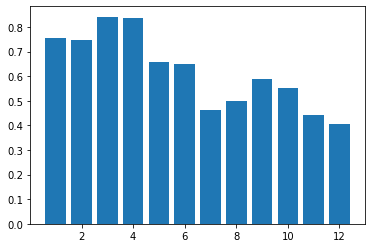

In [62]:
all_means = [mean_a_train_acc, mean_corr_train_acc, mean_a_train_bal, mean_corr_train_bal, mean_a_train_f1, mean_corr_train_f1,
            mean_a_test_acc, mean_corr_test_acc, mean_a_test_bal, mean_corr_test_bal, mean_a_test_f1, mean_corr_test_f1]
labels = np.arange(1,13)
plt.bar(labels, all_means)

In [33]:
# load all the scores of all datasets
all_norm_lr = np.load(classifier_folder + '100_clf_allscores_corr_amat_norm_lr.npy', allow_pickle=True).flat[0]
all_norm_rf = np.load(classifier_folder + '100_clf_allscores_corr_amat_norm_rf.npy', allow_pickle=True).flat[0]
all_norm_harm_rf = np.load(classifier_folder + '100_clf_allscores_corr_amat_norm_harm_rf.npy', allow_pickle=True).flat[0]
inliers_norm_lr_rf = np.load(classifier_folder + '100_clf_allscores_inliers_corr_amat_norm_lr_rf.npy', allow_pickle=True).flat[0]

all_norm_lr = pd.DataFrame(all_norm_lr)
all_norm_rf = pd.DataFrame(all_norm_rf)
all_norm_harm_rf = pd.DataFrame(all_norm_harm_rf)
inliers_norm_lr_rf = pd.DataFrame(inliers_norm_lr_rf)

In [36]:
all_norm_lr

,all_corr,all_Amat
Lasso_cv Training Accuracy,0.744409,0.761981
Lasso_cv Training Balanced Accuracy,0.833333,0.844792
Lasso_cv Training F1 Score,0.646018,0.662132
Lasso_cv Testing Accuracy,0.520384,0.467626
Lasso_cv Testing Balanced Accuracy,0.585179,0.574683
Lasso_cv Testing F1 Score,0.431818,0.430769
Lasso_cv All Testing Accs,"[0.5347721822541966, 0.5443645083932853, 0.513...","[0.45083932853717024, 0.4628297362110312, 0.50..."
Lasso_cv All Testing Balanced Accs,"[0.5294808064070698, 0.5250694444444444, 0.494...","[0.5325480153649167, 0.5503597122302158, 0.575..."
Lasso_cv All Testing F1 Scores,"[0.3741935483870968, 0.3624161073825503, 0.321...","[0.3989501312335958, 0.4166666666666667, 0.442..."
Lasso_cv All Probabilities,"[[0.06145903982362759, 0.8222501619259126, 0.4...","[[3.043612650915266e-05, 0.9997375037136744, 0..."


In [ ]:
# check for each of these whether A matrices perform better or not 

In [43]:
# All data, normalized, Logistic Regression
# Testing Accuary
all_testing_acc_statss, all_testing_acc_pvals = stats.ttest_ind(all_norm_lr["all_corr"]["Lasso_cv All Testing Accs"], all_norm_lr["all_Amat"]["Lasso_cv All Testing Accs"])
print("P-value for difference in testing accuracy for all data, norm, LR: ", all_testing_acc_pvals/2)
print("Mean Value A: ", np.mean(all_norm_lr["all_Amat"]["Lasso_cv All Testing Accs"]))
print("Mean value corr: ", np.mean(all_norm_lr["all_corr"]["Lasso_cv All Testing Accs"]))

# t-test on training balanced accuracy
all_testing_bal_acc_statss, all_testing_bal_acc_pvals = stats.ttest_ind(all_norm_lr["all_corr"]["Lasso_cv All Testing Balanced Accs"], all_norm_lr["all_Amat"]["Lasso_cv All Testing Balanced Accs"])
print("P-value for difference in balanced testing accuracy for all data, norm, LR: ", all_testing_bal_acc_pvals/2)
print("Mean Value A: ", np.mean(all_norm_lr["all_Amat"]["Lasso_cv All Testing Balanced Accs"]))
print("Mean value corr: ", np.mean(all_norm_lr["all_corr"]["Lasso_cv All Testing Balanced Accs"]))

# t-test on training F1
all_testing_f1_statss, all_testing_f1_pvals = stats.ttest_ind(all_norm_lr["all_corr"]["Lasso_cv All Testing F1 Scores"], all_norm_lr["all_Amat"]["Lasso_cv All Testing F1 Scores"])
print("P-value for difference in F1 for all data, norm, LR: ", all_testing_f1_pvals/2)
print("Mean Value A: ", np.mean(all_norm_lr["all_Amat"]["Lasso_cv All Testing F1 Scores"]))
print("Mean value corr: ", np.mean(all_norm_lr["all_corr"]["Lasso_cv All Testing F1 Scores"]))

P-value for difference in testing accuracy for all data, norm, LR:  4.6422953034565965e-06
Mean Value A:  0.48959232613908865
Mean value corr:  0.5116546762589929
P-value for difference in balanced testing accuracy for all data, norm, LR:  0.00010776246322363839
Mean Value A:  0.5533785412448904
Mean value corr:  0.538423371495039
P-value for difference in F1 for all data, norm, LR:  1.0981939608971545e-06
Mean Value A:  0.4163805216333812
Mean value corr:  0.3902574231232653


In [44]:
all_norm_rf

,all_corr,all_Amat
RandomForest_cv Training Accuracy,0.731629,0.728435
RandomForest_cv Training Balanced Accuracy,0.825,0.822917
RandomForest_cv Training F1 Score,0.634783,0.632035
RandomForest_cv Testing Accuracy,0.513189,0.46283
RandomForest_cv Testing Balanced Accuracy,0.574137,0.624325
RandomForest_cv Testing F1 Score,0.421652,0.474178
RandomForest_cv All Testing Accs,"[0.47961630695443647, 0.4580335731414868, 0.44...","[0.4892086330935252, 0.44364508393285373, 0.44..."
RandomForest_cv All Testing Balanced Accs,"[0.5676766374419804, 0.5854448603512813, 0.524...","[0.5660981613583844, 0.6258735269936969, 0.627..."
RandomForest_cv All Testing F1 Scores,"[0.43342036553524804, 0.446078431372549, 0.391...","[0.432, 0.46543778801843316, 0.467592592592592..."
RandomForest_cv All Probabilities,"[[0.4878091815589252, 0.5873851902007203, 0.47...","[[0.5011226311625747, 0.555031496009002, 0.386..."


In [46]:
# All data, normalized, Random Forest
# Testing Accuary
all_testing_acc_statss, all_testing_acc_pvals = stats.ttest_ind(all_norm_rf["all_corr"]["RandomForest_cv All Testing Accs"], all_norm_rf["all_Amat"]["RandomForest_cv All Testing Accs"])
print("P-value for difference in testing accuracy for all data, norm, RF: ", all_testing_acc_pvals/2)
print("Mean Value A: ", np.mean(all_norm_rf["all_Amat"]["RandomForest_cv All Testing Accs"]))
print("Mean value corr: ", np.mean(all_norm_rf["all_corr"]["RandomForest_cv All Testing Accs"]))

# t-test on training balanced accuracy
all_testing_bal_acc_statss, all_testing_bal_acc_pvals = stats.ttest_ind(all_norm_rf["all_corr"]["RandomForest_cv All Testing Balanced Accs"], all_norm_rf["all_Amat"]["RandomForest_cv All Testing Balanced Accs"])
print("P-value for difference in balanced testing accuracy for all data, norm, RF: ", all_testing_bal_acc_pvals/2)
print("Mean Value A: ", np.mean(all_norm_rf["all_Amat"]["RandomForest_cv All Testing Balanced Accs"]))
print("Mean value corr: ", np.mean(all_norm_rf["all_corr"]["RandomForest_cv All Testing Balanced Accs"]))

# t-test on training F1
all_testing_f1_statss, all_testing_f1_pvals = stats.ttest_ind(all_norm_rf["all_corr"]["RandomForest_cv All Testing F1 Scores"], all_norm_rf["all_Amat"]["RandomForest_cv All Testing F1 Scores"])
print("P-value for difference in F1 for all data, norm, RF: ", all_testing_f1_pvals/2)
print("Mean Value A: ", np.mean(all_norm_rf["all_Amat"]["RandomForest_cv All Testing F1 Scores"]))
print("Mean value corr: ", np.mean(all_norm_rf["all_corr"]["RandomForest_cv All Testing F1 Scores"]))

P-value for difference in testing accuracy for all data, norm, RF:  1.9043749077267176e-21
Mean Value A:  0.4764988009592325
Mean value corr:  0.5207913669064748
P-value for difference in balanced testing accuracy for all data, norm, RF:  1.5894219252972885e-28
Mean Value A:  0.5907234465853347
Mean value corr:  0.5434281136164691
P-value for difference in F1 for all data, norm, RF:  4.0916241459566154e-26
Mean Value A:  0.44952613488845566
Mean value corr:  0.39622094430722277


In [47]:
all_norm_harm_rf

,all_corr,all_Amat
RandomForest_cv Training Accuracy,0.78754,0.835463
RandomForest_cv Training Balanced Accuracy,0.861458,0.892708
RandomForest_cv Training F1 Score,0.687059,0.739241
RandomForest_cv Testing Accuracy,0.431655,0.460432
RandomForest_cv Testing Balanced Accuracy,0.513256,0.548095
RandomForest_cv Testing F1 Score,0.377953,0.406332
RandomForest_cv All Testing Accs,"[0.44364508393285373, 0.42206235011990406, 0.4...","[0.41007194244604317, 0.45323741007194246, 0.4..."
RandomForest_cv All Testing Balanced Accs,"[0.5021208132221735, 0.49532426831117626, 0.53...","[0.5101369863013698, 0.5615479452054795, 0.526..."
RandomForest_cv All Testing F1 Scores,"[0.3626373626373627, 0.3607427055702917, 0.394...","[0.3819095477386934, 0.4271356783919598, 0.394..."
RandomForest_cv All Probabilities,"[[0.5577239060524881, 0.46102478693139176, 0.5...","[[0.5204141885180874, 0.5126505937204978, 0.63..."


In [48]:
# All data, normalized, harmonized, Random Forest
# Testing Accuary
all_testing_acc_statss, all_testing_acc_pvals = stats.ttest_ind(all_norm_harm_rf["all_corr"]["RandomForest_cv All Testing Accs"], all_norm_harm_rf["all_Amat"]["RandomForest_cv All Testing Accs"])
print("P-value for difference in testing accuracy for all data, harm, norm, RF: ", all_testing_acc_pvals/2)
print("Mean Value A: ", np.mean(all_norm_harm_rf["all_Amat"]["RandomForest_cv All Testing Accs"]))
print("Mean value corr: ", np.mean(all_norm_harm_rf["all_corr"]["RandomForest_cv All Testing Accs"]))

# t-test on training balanced accuracy
all_testing_bal_acc_statss, all_testing_bal_acc_pvals = stats.ttest_ind(all_norm_harm_rf["all_corr"]["RandomForest_cv All Testing Balanced Accs"], all_norm_harm_rf["all_Amat"]["RandomForest_cv All Testing Balanced Accs"])
print("P-value for difference in balanced testing accuracy for all data, harm, norm, RF: ", all_testing_bal_acc_pvals/2)
print("Mean Value A: ", np.mean(all_norm_harm_rf["all_Amat"]["RandomForest_cv All Testing Balanced Accs"]))
print("Mean value corr: ", np.mean(all_norm_harm_rf["all_corr"]["RandomForest_cv All Testing Balanced Accs"]))

# t-test on training F1
all_testing_f1_statss, all_testing_f1_pvals = stats.ttest_ind(all_norm_harm_rf["all_corr"]["RandomForest_cv All Testing F1 Scores"], all_norm_harm_rf["all_Amat"]["RandomForest_cv All Testing F1 Scores"])
print("P-value for difference in F1 for all data, harm, norm, RF: ", all_testing_f1_pvals/2)
print("Mean Value A: ", np.mean(all_norm_harm_rf["all_Amat"]["RandomForest_cv All Testing F1 Scores"]))
print("Mean value corr: ", np.mean(all_norm_harm_rf["all_corr"]["RandomForest_cv All Testing F1 Scores"]))

P-value for difference in testing accuracy for all data, harm, norm, RF:  0.314428886367758
Mean Value A:  0.4606714628297361
Mean value corr:  0.4628776978417266
P-value for difference in balanced testing accuracy for all data, harm, norm, RF:  6.594698366432925e-13
Mean Value A:  0.5337185196601534
Mean value corr:  0.5125507740318187
P-value for difference in F1 for all data, harm, norm, RF:  3.09635159743751e-16
Mean Value A:  0.39820657944373056
Mean value corr:  0.3703230543788755


In [49]:
inliers_norm_lr_rf

,inliers_corr,inliers_Amat
Lasso_cv Training Accuracy,0.733447,0.733447
Lasso_cv Training Balanced Accuracy,0.827093,0.827093
Lasso_cv Training F1 Score,0.632319,0.632319
Lasso_cv Testing Accuracy,0.508642,0.45679
Lasso_cv Testing Balanced Accuracy,0.538294,0.578431
Lasso_cv Testing F1 Score,0.380062,0.43299
Lasso_cv All Testing Accs,"[0.528395061728395, 0.5259259259259259, 0.5506...","[0.5160493827160494, 0.5456790123456791, 0.530..."
Lasso_cv All Testing Balanced Accs,"[0.5192307692307693, 0.49333813021040096, 0.55...","[0.5698375929131453, 0.554945054945055, 0.5684..."
Lasso_cv All Testing F1 Scores,"[0.3569023569023569, 0.30935251798561153, 0.40...","[0.4335260115606937, 0.4102564102564103, 0.431..."
Lasso_cv All Probabilities,"[[4.816285397361614e-06, 0.9962412371547285, 0...","[[0.10181698852132891, 0.9943199296356696, 0.0..."


In [53]:
# Inliers, normalized, Random Forest
# Testing Accuary
all_testing_acc_statss, all_testing_acc_pvals = stats.ttest_ind(inliers_norm_lr_rf["inliers_corr"]["RandomForest_cv All Testing Accs"], inliers_norm_lr_rf["inliers_Amat"]["RandomForest_cv All Testing Accs"])
print("P-value for difference in testing accuracy for inliers, norm, RF: ", all_testing_acc_pvals/2)
print("Mean Value A: ", np.mean(inliers_norm_lr_rf["inliers_Amat"]["RandomForest_cv All Testing Accs"]))
print("Mean value corr: ", np.mean(inliers_norm_lr_rf["inliers_corr"]["RandomForest_cv All Testing Accs"]))

# t-test on training balanced accuracy
all_testing_bal_acc_statss, all_testing_bal_acc_pvals = stats.ttest_ind(inliers_norm_lr_rf["inliers_corr"]["RandomForest_cv All Testing Balanced Accs"], inliers_norm_lr_rf["inliers_Amat"]["RandomForest_cv All Testing Balanced Accs"])
print("P-value for difference in balanced testing accuracy for inliers, norm, RF: ", all_testing_bal_acc_pvals/2)
print("Mean Value A: ", np.mean(inliers_norm_lr_rf["inliers_Amat"]["RandomForest_cv All Testing Balanced Accs"]))
print("Mean value corr: ", np.mean(inliers_norm_lr_rf["inliers_corr"]["RandomForest_cv All Testing Balanced Accs"]))

# t-test on training F1
all_testing_f1_statss, all_testing_f1_pvals = stats.ttest_ind(inliers_norm_lr_rf["inliers_corr"]["RandomForest_cv All Testing F1 Scores"], inliers_norm_lr_rf["inliers_Amat"]["RandomForest_cv All Testing F1 Scores"])
print("P-value for difference in F1 for inliers, norm, RF: ", all_testing_f1_pvals/2)
print("Mean Value A: ", np.mean(inliers_norm_lr_rf["inliers_Amat"]["RandomForest_cv All Testing F1 Scores"]))
print("Mean value corr: ", np.mean(inliers_norm_lr_rf["inliers_corr"]["RandomForest_cv All Testing F1 Scores"]))

P-value for difference in testing accuracy for inliers, norm, RF:  8.862171118018861e-25
Mean Value A:  0.4765679012345678
Mean value corr:  0.5252345679012346
P-value for difference in balanced testing accuracy for inliers, norm, RF:  3.4589316823316895e-30
Mean Value A:  0.5919089674930479
Mean value corr:  0.5425781708807581
P-value for difference in F1 for inliers, norm, RF:  3.362683487372931e-28
Mean Value A:  0.44825078576894944
Mean value corr:  0.3919853396901683


In [54]:
# Inliers, normalized, Logistic Regression
# Testing Accuary
all_testing_acc_statss, all_testing_acc_pvals = stats.ttest_ind(inliers_norm_lr_rf["inliers_corr"]["Lasso_cv All Testing Accs"], inliers_norm_lr_rf["inliers_Amat"]["Lasso_cv All Testing Accs"])
print("P-value for difference in testing accuracy for inliers, norm, LR: ", all_testing_acc_pvals/2)
print("Mean Value A: ", np.mean(inliers_norm_lr_rf["inliers_Amat"]["Lasso_cv All Testing Accs"]))
print("Mean value corr: ", np.mean(inliers_norm_lr_rf["inliers_corr"]["Lasso_cv All Testing Accs"]))

# t-test on training balanced accuracy
all_testing_bal_acc_statss, all_testing_bal_acc_pvals = stats.ttest_ind(inliers_norm_lr_rf["inliers_corr"]["Lasso_cv All Testing Balanced Accs"], inliers_norm_lr_rf["inliers_Amat"]["Lasso_cv All Testing Balanced Accs"])
print("P-value for difference in balanced testing accuracy for inliers, norm, LR: ", all_testing_bal_acc_pvals/2)
print("Mean Value A: ", np.mean(inliers_norm_lr_rf["inliers_Amat"]["Lasso_cv All Testing Balanced Accs"]))
print("Mean value corr: ", np.mean(inliers_norm_lr_rf["inliers_corr"]["Lasso_cv All Testing Balanced Accs"]))

# t-test on training F1
all_testing_f1_statss, all_testing_f1_pvals = stats.ttest_ind(inliers_norm_lr_rf["inliers_corr"]["Lasso_cv All Testing F1 Scores"], inliers_norm_lr_rf["inliers_Amat"]["Lasso_cv All Testing F1 Scores"])
print("P-value for difference in F1 for inliers, norm, LR: ", all_testing_f1_pvals/2)
print("Mean Value A: ", np.mean(inliers_norm_lr_rf["inliers_Amat"]["Lasso_cv All Testing F1 Scores"]))
print("Mean value corr: ", np.mean(inliers_norm_lr_rf["inliers_corr"]["Lasso_cv All Testing F1 Scores"]))

P-value for difference in testing accuracy for inliers, norm, LR:  4.640516031346209e-08
Mean Value A:  0.48409876543209873
Mean value corr:  0.5098271604938271
P-value for difference in balanced testing accuracy for inliers, norm, LR:  8.944023637765463e-17
Mean Value A:  0.5582079764869983
Mean value corr:  0.5212498231278088
P-value for difference in F1 for inliers, norm, LR:  2.798632965193555e-18
Mean Value A:  0.41839598385505783
Mean value corr:  0.3612970012245579


# Get all the mean values and std

In [65]:
mean_all_a_lasso_test_acc = np.mean(all_norm_lr["all_Amat"]["Lasso_cv All Testing Accs"])
mean_all_corr_lasso_test_acc = np.mean(all_norm_lr["all_corr"]["Lasso_cv All Testing Accs"])
std_all_a_lasso_test_acc = np.std(all_norm_lr["all_Amat"]["Lasso_cv All Testing Accs"])
std_all_corr_lasso_test_acc = np.std(all_norm_lr["all_corr"]["Lasso_cv All Testing Accs"])

mean_all_a_lasso_test_bal_acc = np.mean(all_norm_lr["all_Amat"]["Lasso_cv All Testing Balanced Accs"])
mean_all_corr_lasso_test_bal_acc = np.mean(all_norm_lr["all_corr"]["Lasso_cv All Testing Balanced Accs"])
std_all_a_lasso_test_bal_acc = np.std(all_norm_lr["all_Amat"]["Lasso_cv All Testing Balanced Accs"])
std_all_corr_lasso_test_bal_acc = np.std(all_norm_lr["all_corr"]["Lasso_cv All Testing Balanced Accs"])

mean_all_a_lasso_test_f1 = np.mean(all_norm_lr["all_Amat"]["Lasso_cv All Testing F1 Scores"])
mean_all_corr_lasso_test_f1 = np.mean(all_norm_lr["all_corr"]["Lasso_cv All Testing F1 Scores"])
std_all_a_lasso_test_f1 = np.std(all_norm_lr["all_Amat"]["Lasso_cv All Testing F1 Scores"])
std_all_corr_lasso_test_f1 = np.std(all_norm_lr["all_corr"]["Lasso_cv All Testing F1 Scores"])

mean_all_a_rf_test_acc = np.mean(all_norm_rf["all_Amat"]["RandomForest_cv All Testing Accs"])
mean_all_corr_rf_test_acc = np.mean(all_norm_rf["all_corr"]["RandomForest_cv All Testing Accs"])
std_all_a_rf_test_acc = np.std(all_norm_rf["all_Amat"]["RandomForest_cv All Testing Accs"])
std_all_corr_rf_test_acc = np.std(all_norm_rf["all_corr"]["RandomForest_cv All Testing Accs"])

mean_all_a_rf_test_bal = np.mean(all_norm_rf["all_Amat"]["RandomForest_cv All Testing Balanced Accs"])
mean_all_corr_rf_test_bal = np.mean(all_norm_rf["all_corr"]["RandomForest_cv All Testing Balanced Accs"])
std_all_a_rf_test_bal = np.std(all_norm_rf["all_Amat"]["RandomForest_cv All Testing Balanced Accs"])
std_all_corr_rf_test_bal = np.std(all_norm_rf["all_corr"]["RandomForest_cv All Testing Balanced Accs"])

mean_all_a_rf_test_f1 = np.mean(all_norm_rf["all_Amat"]["RandomForest_cv All Testing F1 Scores"])
mean_all_corr_rf_test_f1 = np.mean(all_norm_rf["all_corr"]["RandomForest_cv All Testing F1 Scores"])
std_all_a_rf_test_f1 = np.std(all_norm_rf["all_Amat"]["RandomForest_cv All Testing F1 Scores"])
std_all_corr_rf_test_f1 = np.std(all_norm_rf["all_corr"]["RandomForest_cv All Testing F1 Scores"])

mean_all_a_harm_rf_test_acc = np.mean(all_norm_harm_rf["all_Amat"]["RandomForest_cv All Testing Accs"])
mean_all_corr_harm_rf_test_acc = np.mean(all_norm_harm_rf["all_corr"]["RandomForest_cv All Testing Accs"])
std_all_a_harm_rf_test_acc = np.std(all_norm_harm_rf["all_Amat"]["RandomForest_cv All Testing Accs"])
std_all_corr_harm_rf_test_acc = np.std(all_norm_harm_rf["all_corr"]["RandomForest_cv All Testing Accs"])

mean_all_a_harm_rf_bal = np.mean(all_norm_harm_rf["all_Amat"]["RandomForest_cv All Testing Balanced Accs"])
mean_all_corr_harm_rf_bal = np.mean(all_norm_harm_rf["all_corr"]["RandomForest_cv All Testing Balanced Accs"])
std_all_a_harm_rf_bal = np.std(all_norm_harm_rf["all_Amat"]["RandomForest_cv All Testing Balanced Accs"])
std_all_corr_harm_rf_bal = np.std(all_norm_harm_rf["all_corr"]["RandomForest_cv All Testing Balanced Accs"])

mean_all_a_harm_rf_f1 = np.mean(all_norm_harm_rf["all_Amat"]["RandomForest_cv All Testing F1 Scores"])
mean_all_corr_harm_rf_f1 = np.mean(all_norm_harm_rf["all_corr"]["RandomForest_cv All Testing F1 Scores"])
std_all_a_harm_rf_f1 = np.std(all_norm_harm_rf["all_Amat"]["RandomForest_cv All Testing F1 Scores"])
std_all_corr_harm_rf_f1 = np.std(all_norm_harm_rf["all_corr"]["RandomForest_cv All Testing F1 Scores"])

mean_inliers_a_acc_rf = np.mean(inliers_norm_lr_rf["inliers_Amat"]["RandomForest_cv All Testing Accs"])
mean_inliers_corr_acc_rf = np.mean(inliers_norm_lr_rf["inliers_corr"]["RandomForest_cv All Testing Accs"])
std_inliers_a_acc_rf = np.std(inliers_norm_lr_rf["inliers_Amat"]["RandomForest_cv All Testing Accs"])
std_inliers_corr_acc_rf = np.std(inliers_norm_lr_rf["inliers_corr"]["RandomForest_cv All Testing Accs"])

mean_inliers_a_bal_rf = np.mean(inliers_norm_lr_rf["inliers_Amat"]["RandomForest_cv All Testing Balanced Accs"])
mean_inliers_corr_bal_rf = np.mean(inliers_norm_lr_rf["inliers_corr"]["RandomForest_cv All Testing Balanced Accs"])
std_inliers_a_bal_rf = np.std(inliers_norm_lr_rf["inliers_Amat"]["RandomForest_cv All Testing Balanced Accs"])
std_inliers_corr_bal_rf = np.std(inliers_norm_lr_rf["inliers_corr"]["RandomForest_cv All Testing Balanced Accs"])

mean_inliers_a_f1_rf = np.mean(inliers_norm_lr_rf["inliers_Amat"]["RandomForest_cv All Testing F1 Scores"])
mean_inliers_corr_f1_rf = np.mean(inliers_norm_lr_rf["inliers_corr"]["RandomForest_cv All Testing F1 Scores"])
std_inliers_a_f1_rf = np.std(inliers_norm_lr_rf["inliers_Amat"]["RandomForest_cv All Testing F1 Scores"])
std_inliers_corr_f1_rf = np.std(inliers_norm_lr_rf["inliers_corr"]["RandomForest_cv All Testing F1 Scores"])

mean_inliers_a_acc_lr = np.mean(inliers_norm_lr_rf["inliers_Amat"]["Lasso_cv All Testing Accs"])
mean_inliers_corr_acc_lr = np.mean(inliers_norm_lr_rf["inliers_corr"]["Lasso_cv All Testing Accs"])
std_inliers_a_acc_lr = np.std(inliers_norm_lr_rf["inliers_Amat"]["Lasso_cv All Testing Accs"])
std_inliers_corr_acc_lr = np.std(inliers_norm_lr_rf["inliers_corr"]["Lasso_cv All Testing Accs"])

mean_inliers_a_bal_lr = np.mean(inliers_norm_lr_rf["inliers_Amat"]["Lasso_cv All Testing Balanced Accs"])
mean_inliers_corr_bal_lr = np.mean(inliers_norm_lr_rf["inliers_corr"]["Lasso_cv All Testing Balanced Accs"])
std_inliers_a_bal_lr = np.std(inliers_norm_lr_rf["inliers_Amat"]["Lasso_cv All Testing Balanced Accs"])
std_inliers_corr_bal_lr = np.std(inliers_norm_lr_rf["inliers_corr"]["Lasso_cv All Testing Balanced Accs"])

mean_inliers_a_f1_lr = np.mean(inliers_norm_lr_rf["inliers_Amat"]["Lasso_cv All Testing F1 Scores"])
mean_inliers_corr_f1_lr = np.mean(inliers_norm_lr_rf["inliers_corr"]["Lasso_cv All Testing F1 Scores"])
std_inliers_a_f1_lr = np.std(inliers_norm_lr_rf["inliers_Amat"]["Lasso_cv All Testing F1 Scores"])
std_inliers_corr_f1_lr = np.std(inliers_norm_lr_rf["inliers_corr"]["Lasso_cv All Testing F1 Scores"])
